# Question 1

## What is the most booked neighbourhood in Paris ?

### Introduction





This notebook contains the analysis performed to solve our first question about the **most booked neighbourhood** in **Paris** in **June** 2022.
The data was collected from [**Inside Airbnb** website](http://insideairbnb.com/get-the-data/).
Check this section to get the [**listings**](http://data.insideairbnb.com/france/ile-de-france/paris/2022-06-06/data/listings.csv.gz) data, the [**calendar**](http://data.insideairbnb.com/france/ile-de-france/paris/2022-06-06/data/calendar.csv.gz) and also the [**reviews**](http://data.insideairbnb.com/france/ile-de-france/paris/2022-06-06/data/reviews.csv.gz) data provided in **Paris, Île-de-France, France** section.
This data will be used to answer the questions and complete this analysis about **Paris-Airbnb-data**.





In [25]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
# Reading the data files
listings = pd.read_csv('data/paris-airbnb/listings.csv')
calendar = pd.read_csv('data/paris-airbnb/calendar.csv')

In [27]:
# Looking into the dataframes
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,26660141,https://www.airbnb.com/rooms/26660141,20220606014139,2022-06-07,"CHARMANT APPARTEMENT, 50M2 AUX PORTES DE PARIS","Charmant appartement avec petit balcon filant,...",La rue principale à la sortie du métro est trè...,https://a0.muscache.com/pictures/a776b332-0fde...,200407698,https://www.airbnb.com/users/show/200407698,...,5.00,4.88,4.94,NaN,f,1,1,0,0,0.38
1,25177338,https://www.airbnb.com/rooms/25177338,20220606014139,2022-06-07,Cosy and quiet appartement at Les Lilas,<b>The space</b><br />Le logement est situé da...,NaN,https://a0.muscache.com/pictures/e984c1e4-6d40...,185793394,https://www.airbnb.com/users/show/185793394,...,4.56,4.50,4.56,NaN,t,1,1,0,0,0.35
2,25218084,https://www.airbnb.com/rooms/25218084,20220606014139,2022-06-07,paris avec une maison,une maison restaurée et faite à notre image ap...,Être dans un véritable maison avec un parc à q...,https://a0.muscache.com/pictures/dbfc69a1-76cb...,190542280,https://www.airbnb.com/users/show/190542280,...,5.00,4.50,5.00,NaN,f,1,1,0,0,0.05
3,23135649,https://www.airbnb.com/rooms/23135649,20220606014139,2022-06-07,"Charming studio, Pont de Neuilly - Paris",Studio apartment in the heart of the prestigio...,The Saint James district of Neuilly sur Seine ...,https://a0.muscache.com/pictures/58399f3d-c271...,171938056,https://www.airbnb.com/users/show/171938056,...,4.94,4.87,4.61,NaN,f,1,0,1,0,0.65
4,23259887,https://www.airbnb.com/rooms/23259887,20220606014139,2022-06-07,A cosy appartement,Situé dans un quartier agréable proche de Chât...,NaN,https://a0.muscache.com/pictures/ad0ade9c-89d5...,20135501,https://www.airbnb.com/users/show/20135501,...,4.86,4.91,4.65,NaN,t,1,1,0,0,0.87


In [28]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,26660141,2022-06-07,f,$90.00,$90.00,5.0,8.0
1,26660141,2022-06-08,f,$90.00,$90.00,5.0,8.0
2,26660141,2022-06-09,f,$90.00,$90.00,5.0,8.0
3,26660141,2022-06-10,f,$90.00,$90.00,5.0,8.0
4,26660141,2022-06-11,f,$90.00,$90.00,5.0,8.0


In [29]:
# Calculating the shapes of dataframes

print('The shape of listings dataframe is:',listings.shape)
print('The shape of calendar dataframe is:',calendar.shape)

The shape of listings dataframe is: (56739, 74)
The shape of calendar dataframe is: (20707929, 7)


In [30]:
# Viewing some descriptive statistics about the numerical values of listings dataframe
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,5.673900e+04,5.673900e+04,5.673900e+04,56727.000000,56727.000000,0.0,56739.000000,56739.000000,56739.000000,0.0,...,44684.000000,44673.000000,44681.000000,44670.000000,44668.000000,56739.000000,56739.000000,56739.000000,56739.000000,45281.000000
mean,6.935639e+16,2.022061e+13,1.128384e+08,12.481041,12.481041,NaN,48.863462,2.343554,3.060135,NaN,...,4.593612,4.793961,4.804103,4.789998,4.608434,10.025045,9.264915,0.538836,0.034826,0.980303
std,1.922281e+17,2.722680e+01,1.360755e+08,83.879858,83.879858,NaN,0.020537,0.040348,1.666769,NaN,...,0.523597,0.402834,0.401047,0.353174,0.467024,31.835610,31.685771,3.410858,0.672199,1.541610
min,5.396000e+03,2.022061e+13,2.626000e+03,0.000000,0.000000,NaN,48.803750,2.206290,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.369082e+07,2.022061e+13,1.463397e+07,1.000000,1.000000,NaN,48.849310,2.319836,2.000000,NaN,...,4.440000,4.750000,4.780000,4.730000,4.500000,1.000000,1.000000,0.000000,0.000000,0.140000
50%,3.092530e+07,2.022061e+13,4.425650e+07,1.000000,1.000000,NaN,48.865160,2.347200,2.000000,NaN,...,4.750000,4.920000,4.940000,4.900000,4.710000,1.000000,1.000000,0.000000,0.000000,0.460000
75%,4.716712e+07,2.022061e+13,1.767666e+08,2.000000,2.000000,NaN,48.879630,2.370911,4.000000,NaN,...,4.960000,5.000000,5.000000,5.000000,4.890000,2.000000,1.000000,0.000000,0.000000,1.220000
max,6.421428e+17,2.022061e+13,4.625783e+08,1246.000000,1246.000000,NaN,48.913920,2.487250,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,5.000000,233.000000,233.000000,75.000000,26.000000,85.170000



We can notice for the moment that **neighbourhood_group_cleansed** and **bathrooms** are the columns with the most missing values. We can confirm that by taking a look into the number of missing values per column.


In [31]:
# View the count of missing values of listings dataframe

listings.isnull().sum().sort_values()

id                                  0
availability_30                     0
number_of_reviews                   0
neighbourhood_cleansed              0
calendar_last_scraped               0
                                ...  
license                         24724
host_about                      29151
calendar_updated                56739
neighbourhood_group_cleansed    56739
bathrooms                       56739
Length: 74, dtype: int64

We can also notice that the **calendar_updated** column is full of missing values.

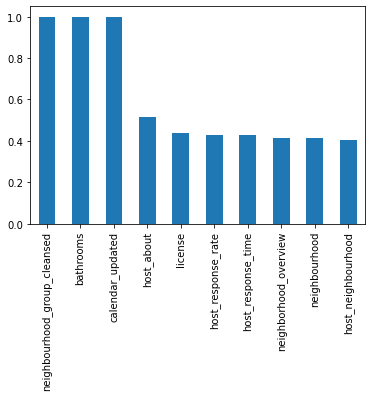

In [32]:
# Plot the ratio of missing values with the number of values for the listings dataframe

(listings.isnull().sum()/listings.shape[0]).sort_values(ascending=False)[:10].plot(kind='bar');



This plot shows the top 10 columns with missing values, we can see that **neighbourhood_group_cleansed**, **bathrooms** and **calendar_updated** come first with 100 % of missing values rate compared to the whole values.

In [33]:
# Viewing some descriptive statistics about the numerical values of calendar dataframe
calendar.describe()

,listing_id,minimum_nights,maximum_nights
count,2.070793e+07,2.070756e+07,2.070756e+07
mean,6.936259e+16,8.954375e+01,4.780960e+05
std,1.922339e+17,1.602215e+02,3.200689e+07
min,5.396000e+03,1.000000e+00,1.000000e+00
25%,1.368675e+07,2.000000e+00,3.000000e+02
50%,3.092166e+07,3.000000e+00,1.125000e+03
75%,4.716802e+07,3.000000e+01,1.125000e+03
max,6.421428e+17,9.999000e+03,2.147484e+09



We can notice that **maxiumum_nights** is the column with the biggest variations of values.


In [34]:
# View the count of missing values of calendar dataframe
calendar.isnull().sum()


listing_id          0
date                0
available           0
price             173
adjusted_price    173
minimum_nights    366
maximum_nights    366
dtype: int64

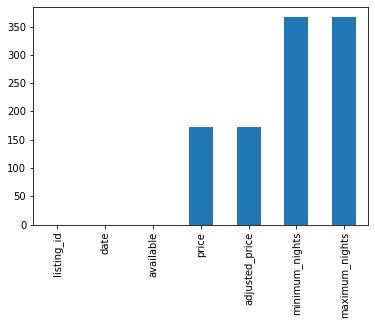

In [35]:
# Plot the number of missing values with the number of values for the calendar dataframe
(calendar.isnull().sum()).plot(kind='bar');



We can conclude from the previous figure that there's a small number of missing values in **calendar** dataframe compared to the whole size of the dataframe.

In [36]:
# Drop the duplicates and columns that are fully missing from the listings dataframe
listings = listings.drop_duplicates()
listings = listings.dropna(axis=1,how='all')
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,26660141,https://www.airbnb.com/rooms/26660141,20220606014139,2022-06-07,"CHARMANT APPARTEMENT, 50M2 AUX PORTES DE PARIS","Charmant appartement avec petit balcon filant,...",La rue principale à la sortie du métro est trè...,https://a0.muscache.com/pictures/a776b332-0fde...,200407698,https://www.airbnb.com/users/show/200407698,...,5.00,4.88,4.94,NaN,f,1,1,0,0,0.38
1,25177338,https://www.airbnb.com/rooms/25177338,20220606014139,2022-06-07,Cosy and quiet appartement at Les Lilas,<b>The space</b><br />Le logement est situé da...,NaN,https://a0.muscache.com/pictures/e984c1e4-6d40...,185793394,https://www.airbnb.com/users/show/185793394,...,4.56,4.50,4.56,NaN,t,1,1,0,0,0.35
2,25218084,https://www.airbnb.com/rooms/25218084,20220606014139,2022-06-07,paris avec une maison,une maison restaurée et faite à notre image ap...,Être dans un véritable maison avec un parc à q...,https://a0.muscache.com/pictures/dbfc69a1-76cb...,190542280,https://www.airbnb.com/users/show/190542280,...,5.00,4.50,5.00,NaN,f,1,1,0,0,0.05
3,23135649,https://www.airbnb.com/rooms/23135649,20220606014139,2022-06-07,"Charming studio, Pont de Neuilly - Paris",Studio apartment in the heart of the prestigio...,The Saint James district of Neuilly sur Seine ...,https://a0.muscache.com/pictures/58399f3d-c271...,171938056,https://www.airbnb.com/users/show/171938056,...,4.94,4.87,4.61,NaN,f,1,0,1,0,0.65
4,23259887,https://www.airbnb.com/rooms/23259887,20220606014139,2022-06-07,A cosy appartement,Situé dans un quartier agréable proche de Chât...,NaN,https://a0.muscache.com/pictures/ad0ade9c-89d5...,20135501,https://www.airbnb.com/users/show/20135501,...,4.86,4.91,4.65,NaN,t,1,1,0,0,0.87




We dropped the **neighbourhood_group_cleansed**, **bathrooms** and **calendar_updated** columns from the listings dataframe.

Since we are interested in solving our first question about the **most booked neighbourhoods in Paris**, we are going to work with a slice of the data that doesn't include missing values in the **neighbourhood** column and **neighbourhood_cleansed** column. 

In [37]:
listings = listings.dropna(subset=['neighbourhood','neighbourhood_cleansed'])
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,26660141,https://www.airbnb.com/rooms/26660141,20220606014139,2022-06-07,"CHARMANT APPARTEMENT, 50M2 AUX PORTES DE PARIS","Charmant appartement avec petit balcon filant,...",La rue principale à la sortie du métro est trè...,https://a0.muscache.com/pictures/a776b332-0fde...,200407698,https://www.airbnb.com/users/show/200407698,...,5.00,4.88,4.94,NaN,f,1,1,0,0,0.38
2,25218084,https://www.airbnb.com/rooms/25218084,20220606014139,2022-06-07,paris avec une maison,une maison restaurée et faite à notre image ap...,Être dans un véritable maison avec un parc à q...,https://a0.muscache.com/pictures/dbfc69a1-76cb...,190542280,https://www.airbnb.com/users/show/190542280,...,5.00,4.50,5.00,NaN,f,1,1,0,0,0.05
3,23135649,https://www.airbnb.com/rooms/23135649,20220606014139,2022-06-07,"Charming studio, Pont de Neuilly - Paris",Studio apartment in the heart of the prestigio...,The Saint James district of Neuilly sur Seine ...,https://a0.muscache.com/pictures/58399f3d-c271...,171938056,https://www.airbnb.com/users/show/171938056,...,4.94,4.87,4.61,NaN,f,1,0,1,0,0.65
6,26767859,https://www.airbnb.com/rooms/26767859,20220606014139,2022-06-07,Private room in a beautiful duplex next to Paris,Private room in a nice duplex (with two rooms)...,10 minutes walk from the Parc de la Villette (...,https://a0.muscache.com/pictures/1de4e19a-a452...,7786899,https://www.airbnb.com/users/show/7786899,...,5.00,4.00,4.00,NaN,f,3,1,2,0,0.03
9,9748063,https://www.airbnb.com/rooms/9748063,20220606014139,2022-06-06,"High standing residence, amazing view over Paris","Bright, panoramic view over Paris, Triple orie...",Puteaux is located at the doors of Paris and t...,https://a0.muscache.com/pictures/e8102d2c-2f6b...,50285920,https://www.airbnb.com/users/show/50285920,...,4.85,4.71,4.73,NaN,f,1,1,0,0,0.75


### To answer the first question, we need to merge the two dataframes **listings** and **calendar** to get more insights about the availability of listings.

In [38]:
# Rename the column listings ID column to match with listing_id in calendar dataframe 
# and also calendar_last_scraped to match the date column of calendar dataframe
listings.rename(columns={"id":'listing_id','calendar_last_scraped':'date','has_availability':'available'},inplace=True)

In [39]:
listings.columns

Index(['listing_id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'available',
       'availability_30', 'availability_60',

In [40]:
# View the availability options from calendar dataframe
calendar.available.value_counts(dropna=False)

f    14868257
t     5839672
Name: available, dtype: int64

In [41]:
# View the available and booked listings 
listings.available.value_counts(dropna=False)

t    33199
f       56
Name: available, dtype: int64

We have a binary availability options **t** for True which means available listing and **f** for False that means booked listing.

In [42]:
# Select the booked listings and drop missing values and duplicates
calendar = calendar.dropna(subset=['listing_id','available','date','minimum_nights','maximum_nights'])
calendar = calendar.drop_duplicates()
booked_listings = calendar.loc[calendar.available=='f']
booked_listings.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,26660141,2022-06-07,f,$90.00,$90.00,5.0,8.0
1,26660141,2022-06-08,f,$90.00,$90.00,5.0,8.0
2,26660141,2022-06-09,f,$90.00,$90.00,5.0,8.0
3,26660141,2022-06-10,f,$90.00,$90.00,5.0,8.0
4,26660141,2022-06-11,f,$90.00,$90.00,5.0,8.0


In [43]:
# Merge booked listings with listings 
merged_df = pd.merge(booked_listings,listings,on=['listing_id','price','available','date','minimum_nights','maximum_nights'],how='inner')
merged_df

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,listing_url,scrape_id,last_scraped,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1384098,2022-06-06,f,$140.00,$140.00,365.0,1125.0,https://www.airbnb.com/rooms/1384098,20220606014139,2022-06-06,...,4.67,4.33,4.67,NaN,f,4,4,0,0,0.05
1,2142687,2022-06-07,f,$46.00,$46.00,120.0,365.0,https://www.airbnb.com/rooms/2142687,20220606014139,2022-06-07,...,4.95,4.85,4.75,"Available with a mobility lease only (""bail mo...",f,1,1,0,0,0.22
2,3076637,2022-06-07,f,$360.00,$360.00,7.0,21.0,https://www.airbnb.com/rooms/3076637,20220606014139,2022-06-07,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
3,4806693,2022-06-07,f,$226.00,$226.00,365.0,1125.0,https://www.airbnb.com/rooms/4806693,20220606014139,2022-06-07,...,NaN,NaN,NaN,NaN,f,2,2,0,0,NaN
4,5475961,2022-06-07,f,$99.00,$99.00,365.0,1125.0,https://www.airbnb.com/rooms/5475961,20220606014139,2022-06-07,...,4.71,4.83,4.65,NaN,f,1,1,0,0,0.83
5,6106068,2022-06-07,f,$80.00,$80.00,365.0,1125.0,https://www.airbnb.com/rooms/6106068,20220606014139,2022-06-07,...,5.00,5.00,5.00,NaN,f,1,1,0,0,0.01
6,7003002,2022-06-07,f,$79.00,$79.00,365.0,365.0,https://www.airbnb.com/rooms/7003002,20220606014139,2022-06-07,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
7,7222381,2022-06-07,f,$160.00,$160.00,365.0,1125.0,https://www.airbnb.com/rooms/7222381,20220606014139,2022-06-07,...,5.00,5.00,5.00,NaN,f,2,1,1,0,0.02
8,7271622,2022-06-07,f,$55.00,$55.00,365.0,1125.0,https://www.airbnb.com/rooms/7271622,20220606014139,2022-06-07,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
9,8181428,2022-06-07,f,$38.00,$38.00,1.0,2.0,https://www.airbnb.com/rooms/8181428,20220606014139,2022-06-07,...,5.00,5.00,5.00,NaN,f,1,0,1,0,0.05



There are only **47** listings who correspond to the bookings calendar.

In [44]:
merged_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,listing_url,scrape_id,last_scraped,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1384098,2022-06-06,f,$140.00,$140.00,365.0,1125.0,https://www.airbnb.com/rooms/1384098,20220606014139,2022-06-06,...,4.67,4.33,4.67,NaN,f,4,4,0,0,0.05
1,2142687,2022-06-07,f,$46.00,$46.00,120.0,365.0,https://www.airbnb.com/rooms/2142687,20220606014139,2022-06-07,...,4.95,4.85,4.75,"Available with a mobility lease only (""bail mo...",f,1,1,0,0,0.22
2,3076637,2022-06-07,f,$360.00,$360.00,7.0,21.0,https://www.airbnb.com/rooms/3076637,20220606014139,2022-06-07,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
3,4806693,2022-06-07,f,$226.00,$226.00,365.0,1125.0,https://www.airbnb.com/rooms/4806693,20220606014139,2022-06-07,...,NaN,NaN,NaN,NaN,f,2,2,0,0,NaN
4,5475961,2022-06-07,f,$99.00,$99.00,365.0,1125.0,https://www.airbnb.com/rooms/5475961,20220606014139,2022-06-07,...,4.71,4.83,4.65,NaN,f,1,1,0,0,0.83


In [45]:
# Look into the date range of the bookings
print('The starting date of the bookings is:',merged_df.date.min())
print('The end date of the bookings is:',merged_df.date.max())


The starting date of the bookings is: 2022-06-06
The end date of the bookings is: 2022-06-07



And now we have the merged dataframe, we're going to be interested in the **neighbourhood_cleansed** column to find out which are the neighbourhoods the most booked in Paris.


In [46]:
# Take a look at the most booked neighbourhood values
neighbourhoods = merged_df['neighbourhood_cleansed']
most_booked = neighbourhoods.sort_values(ascending=False).value_counts(dropna=False).head(10)


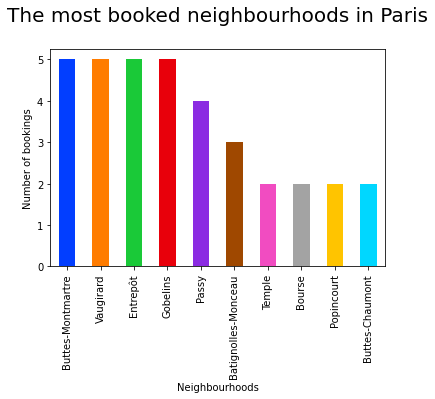

In [47]:
# Plot the most booked neighbourhoods in Paris 
palette_color = sns.color_palette("bright")
plt.title('The most booked neighbourhoods in Paris',fontsize=20,y=1.1);
plt.xlabel('Neighbourhoods')
plt.ylabel('Number of bookings')
most_booked.plot(kind='bar', color=palette_color);
plt.savefig('blog/most_booked.jpg', bbox_inches='tight')


In [48]:
import plotly.express as px
import plotly.graph_objects as go

# Plot the available listings

fig = px.scatter_mapbox(merged_df, lat="latitude",color='neighbourhood_cleansed', lon="longitude", hover_name="neighbourhood_cleansed", hover_data=["minimum_nights","maximum_nights","price","adjusted_price",'available'],
                         zoom=9, height=600,width=800)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## Conclusion


We can see that **Paris, Île-de-France, France** with **47** available bookings in total, is the most booked region in Paris between **2022-06-06** and **2022-06-07** with neighbourhoods as listed in the figure above .
